In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import os, shutil
import warnings
warnings.filterwarnings('ignore')

In [2]:
loaded_model = tf.keras.models.load_model("mobile_net_results3/fish_iden_mobnet3.h5")

In [3]:
loaded_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                    

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

In [216]:
#from keras.utils import plot_model
#import pydot
#plot_model(loaded_model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


Layer 0: input_2 - [(None, 224, 224, 3)]
Layer 1: conv1 - (None, 112, 112, 32)
Layer 2: conv1_bn - (None, 112, 112, 32)
Layer 3: conv1_relu - (None, 112, 112, 32)
Layer 4: conv_dw_1 - (None, 112, 112, 32)
Layer 5: conv_dw_1_bn - (None, 112, 112, 32)
Layer 6: conv_dw_1_relu - (None, 112, 112, 32)
Layer 7: conv_pw_1 - (None, 112, 112, 64)
Layer 8: conv_pw_1_bn - (None, 112, 112, 64)
Layer 9: conv_pw_1_relu - (None, 112, 112, 64)
Layer 10: conv_pad_2 - (None, 113, 113, 64)
Layer 11: conv_dw_2 - (None, 56, 56, 64)
Layer 12: conv_dw_2_bn - (None, 56, 56, 64)
Layer 13: conv_dw_2_relu - (None, 56, 56, 64)
Layer 14: conv_pw_2 - (None, 56, 56, 128)
Layer 15: conv_pw_2_bn - (None, 56, 56, 128)
Layer 16: conv_pw_2_relu - (None, 56, 56, 128)
Layer 17: conv_dw_3 - (None, 56, 56, 128)
Layer 18: conv_dw_3_bn - (None, 56, 56, 128)
Layer 19: conv_dw_3_relu - (None, 56, 56, 128)
Layer 20: conv_pw_3 - (None, 56, 56, 128)
Layer 21: conv_pw_3_bn - (None, 56, 56, 128)
Layer 22: conv_pw_3_relu - (None, 56, 5

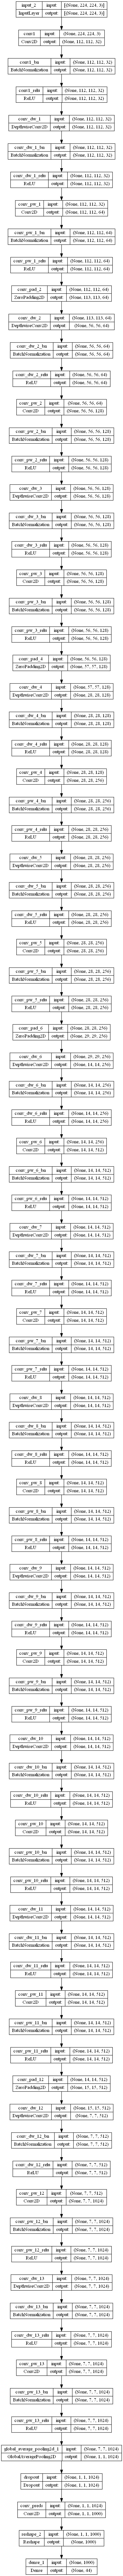

In [4]:
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
import pydot

# assuming "model" is your Keras model
for i, layer in enumerate(loaded_model.layers):
    print(f"Layer {i}: {layer.name} - {layer.output_shape}")

# plot the model architecture
plot_model(loaded_model, to_file='model.png', show_shapes=True)

In [5]:

'''for i in range(len(loaded_model.layers)):
	# check for convolutional layer
	if 'conv' not in loaded_model.layers[i].name:
		continue
	# get filter weights
	filters, biases = loaded_model.layers[i].get_weights()
	print("layer number",i,loaded_model.layers[i].name, filters.shape)'''

for i in range(len(loaded_model.layers)):
	# check for convolutional layer
	if 'conv' not in loaded_model.layers[i].name:
		continue
	# get filter weights and biases
	weights = loaded_model.layers[i].get_weights()
	if len(weights) == 1:
		filters = weights[0]
		print("layer number",i,loaded_model.layers[i].name, filters.shape)
	elif len(weights) == 2:
		filters, biases = weights
		print("layer number",i,loaded_model.layers[i].name, filters.shape, biases.shape)


layer number 1 conv1 (3, 3, 3, 32)
layer number 4 conv_dw_1 (3, 3, 32, 1)
layer number 7 conv_pw_1 (1, 1, 32, 64)
layer number 11 conv_dw_2 (3, 3, 64, 1)
layer number 14 conv_pw_2 (1, 1, 64, 128)
layer number 17 conv_dw_3 (3, 3, 128, 1)
layer number 20 conv_pw_3 (1, 1, 128, 128)
layer number 24 conv_dw_4 (3, 3, 128, 1)
layer number 27 conv_pw_4 (1, 1, 128, 256)
layer number 30 conv_dw_5 (3, 3, 256, 1)
layer number 33 conv_pw_5 (1, 1, 256, 256)
layer number 37 conv_dw_6 (3, 3, 256, 1)
layer number 40 conv_pw_6 (1, 1, 256, 512)
layer number 43 conv_dw_7 (3, 3, 512, 1)
layer number 46 conv_pw_7 (1, 1, 512, 512)
layer number 49 conv_dw_8 (3, 3, 512, 1)
layer number 52 conv_pw_8 (1, 1, 512, 512)
layer number 55 conv_dw_9 (3, 3, 512, 1)
layer number 58 conv_pw_9 (1, 1, 512, 512)
layer number 61 conv_dw_10 (3, 3, 512, 1)
layer number 64 conv_pw_10 (1, 1, 512, 512)
layer number 67 conv_dw_11 (3, 3, 512, 1)
layer number 70 conv_pw_11 (1, 1, 512, 512)
layer number 74 conv_dw_12 (3, 3, 512, 1)
la

In [6]:
# retrieve weights from the second hidden layer
layer_weights = loaded_model.layers[1].get_weights()
if len(layer_weights) == 2:
    filters, bias = layer_weights
else:
    filters = layer_weights[0]


In [7]:
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = np.min(filters), np.max(filters)
filters = (filters - f_min) / (f_max - f_min)

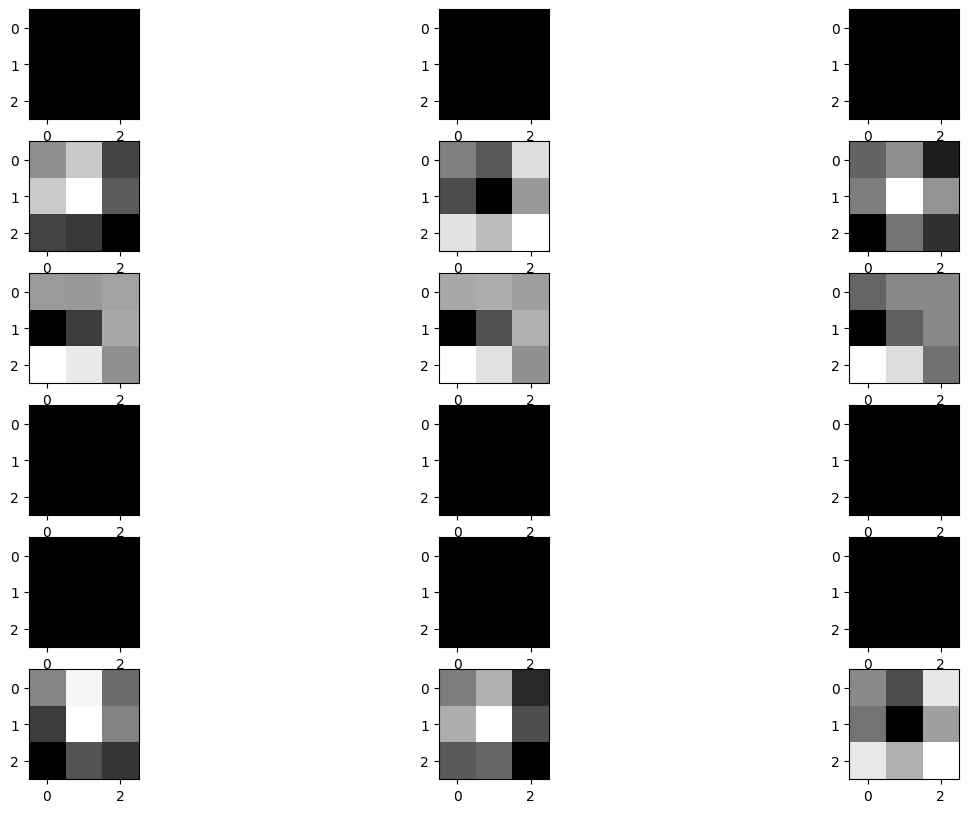

In [8]:

import matplotlib.pyplot as plt
n_filters = 6
ix = 1
fig = plt.figure(figsize=(15,10))
for i in range(n_filters):
    # get the filters
    f = filters[:, :, :, i]
    for j in range(3):
        # subplot for 6 filters and 3 channels
        plt.subplot(n_filters, 3, ix)
        plt.imshow(f[:, :, j], cmap='gray')
        ix += 1
# plot the filter
plt.show()




In [9]:
model = Model(inputs=loaded_model.inputs , outputs=loaded_model.layers[0].output)

In [28]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from numpy import expand_dims
from tensorflow.keras.applications.vgg16 import preprocess_input

image = load_img("internet_samples/sample_catla.png" , target_size=(224,224))

# convert the image to an array
image = img_to_array(image)
# expand dimensions so that it represents a single 'sample'
image = expand_dims(image, axis=0)

image = preprocess_input(image)

1/1 [==============================] - 0s 33ms/step


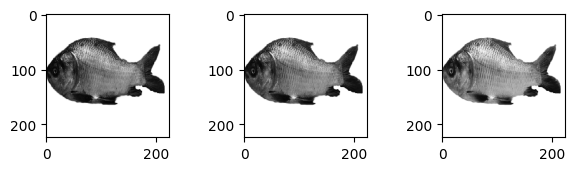

In [29]:
#calculating features_map
features = model.predict(image)

fig = plt.figure(figsize=(20,15))
for i in range(1,features.shape[3]+1):

    plt.subplot(8,8,i)
    plt.imshow(features[0,:,:,i-1] , cmap='gray')
    
plt.show()

In [30]:
model2 = tf.keras.models.load_model("mobile_net_results3/fish_iden_mobnet3.h5")

In [31]:
layer_index = [1,4,7,11,14,17,60,80,88]
outputs = [model2.layers[i].output for i in layer_index]

model3 = Model( inputs= model2.inputs, outputs = outputs)

1/1 [==============================] - 1s 566ms/step


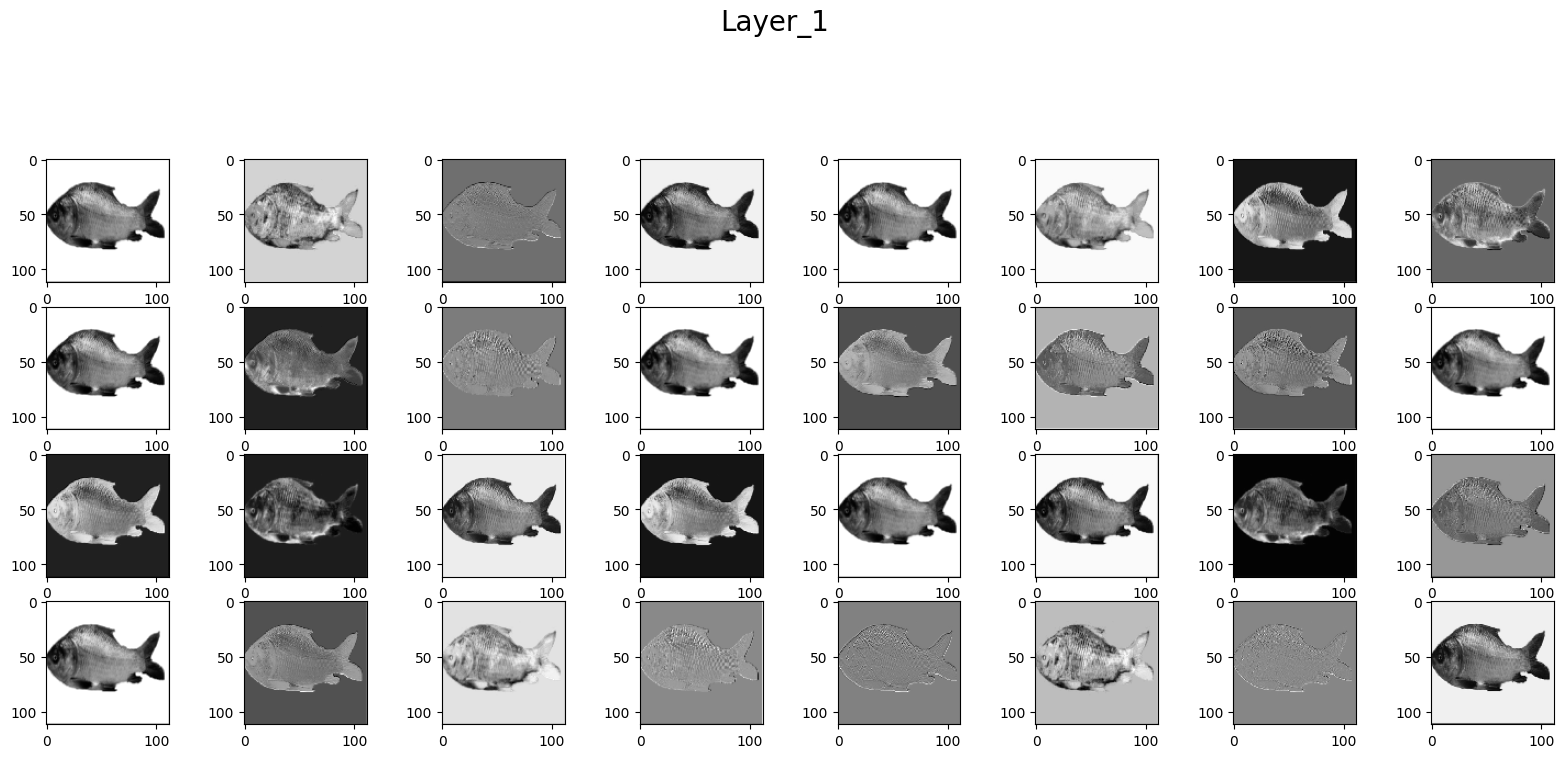

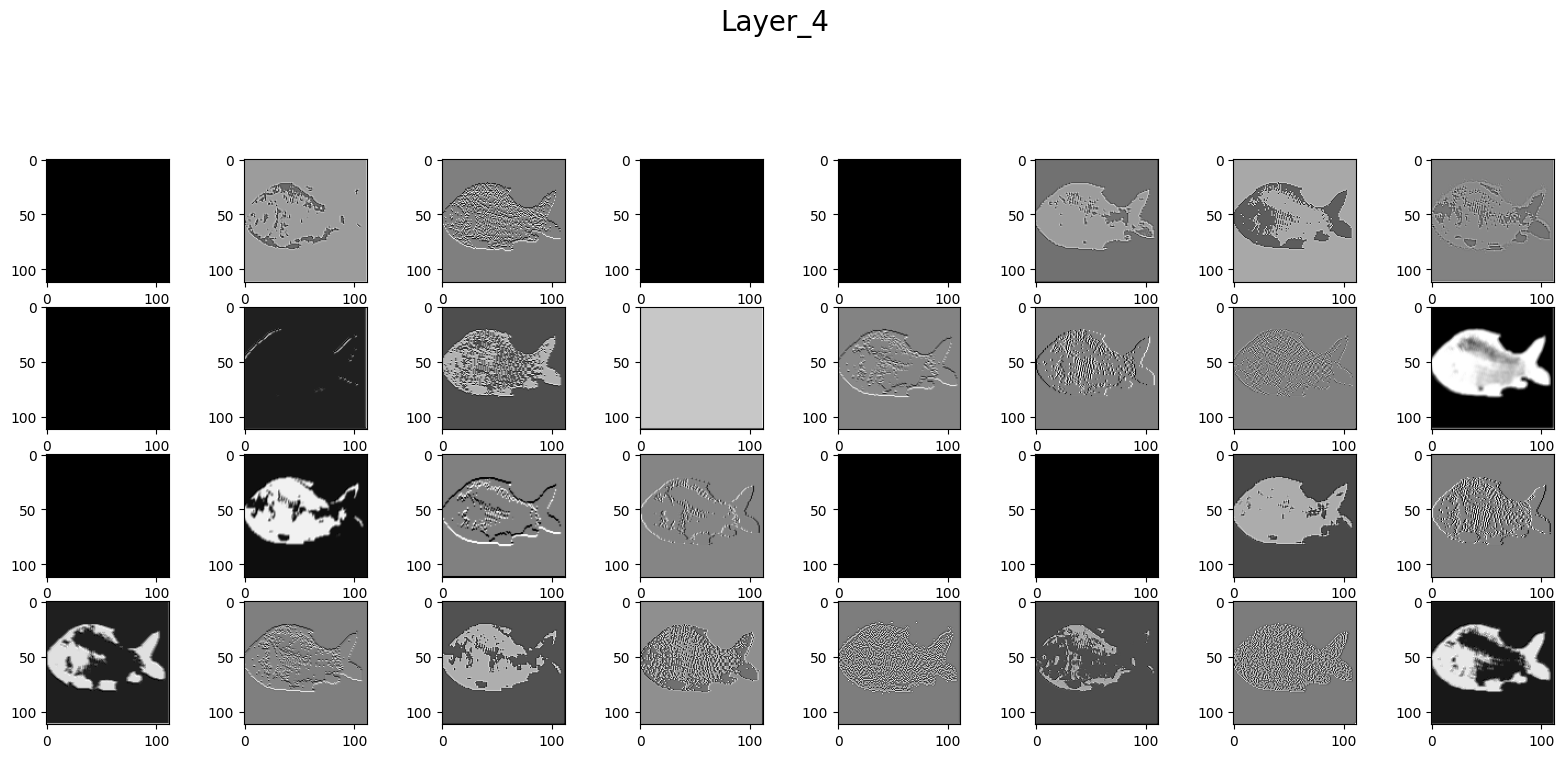

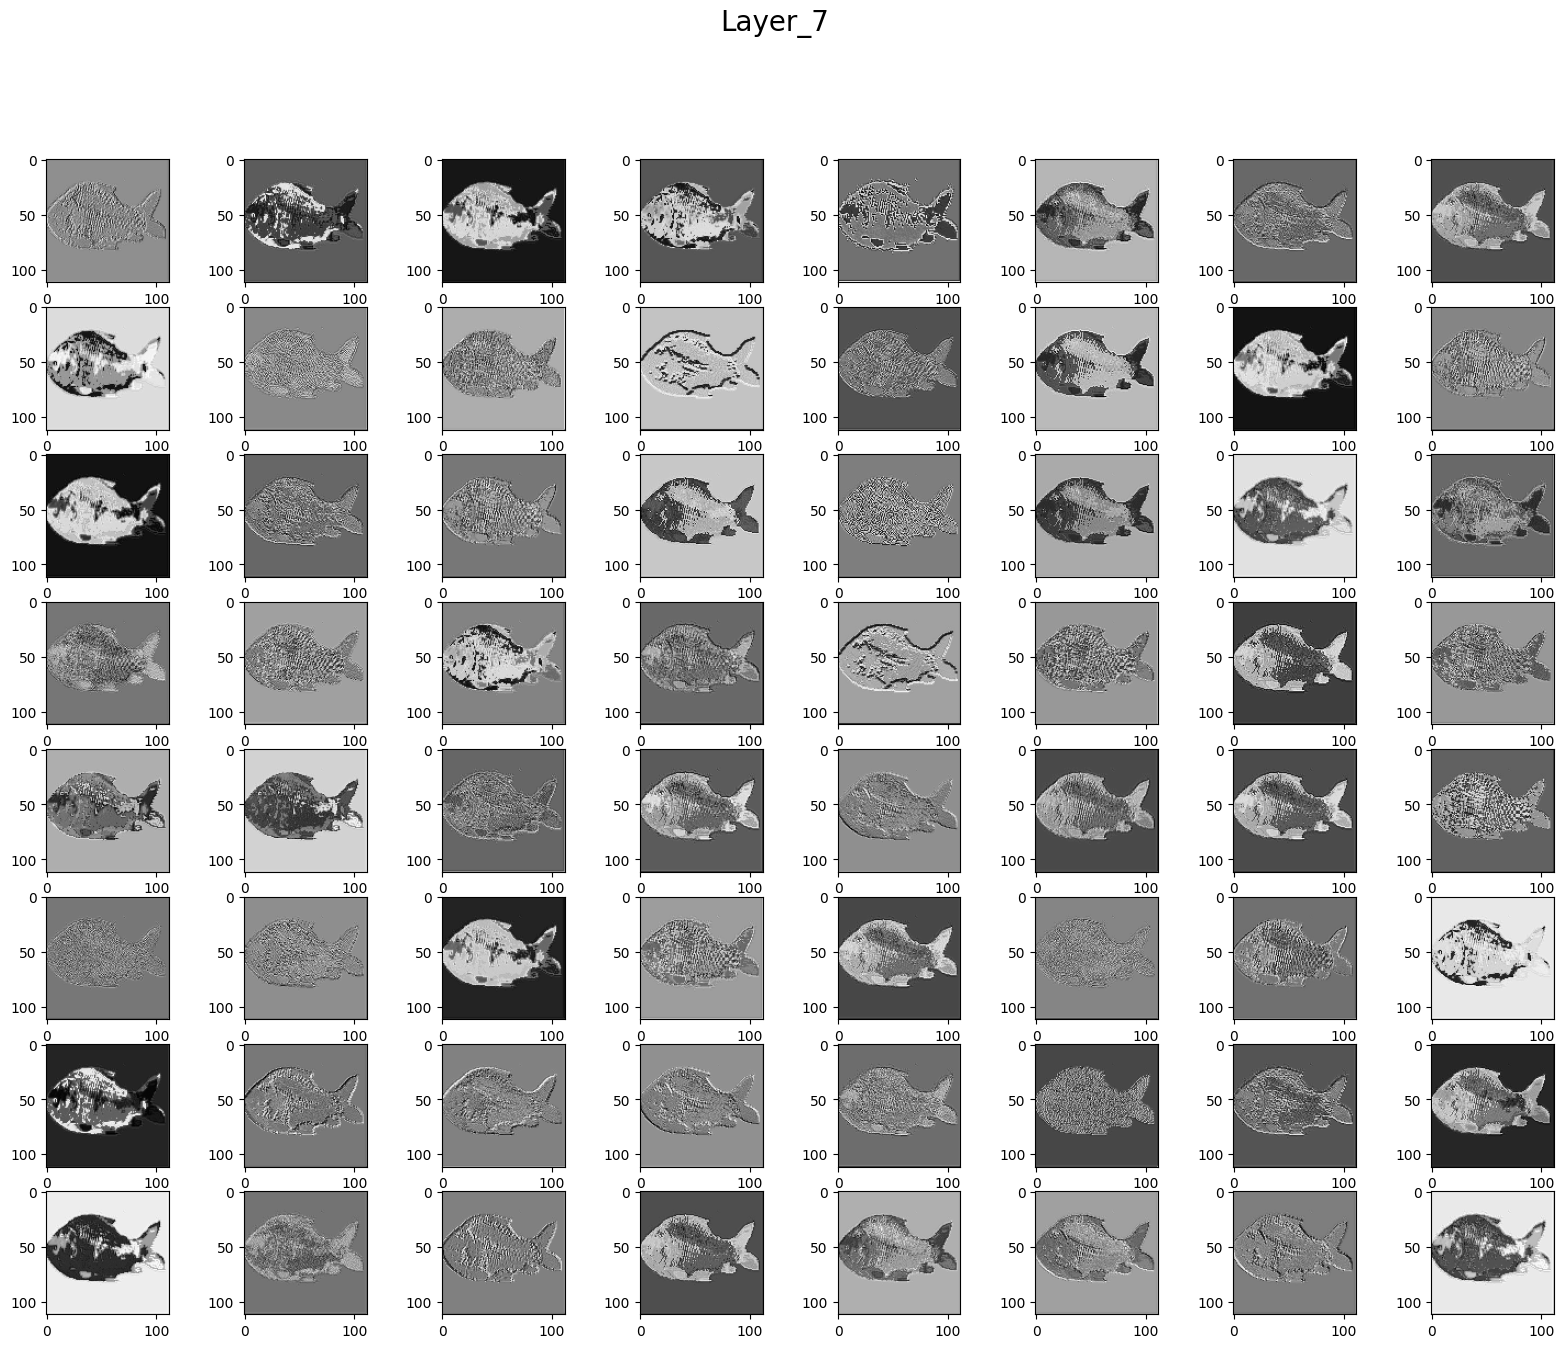

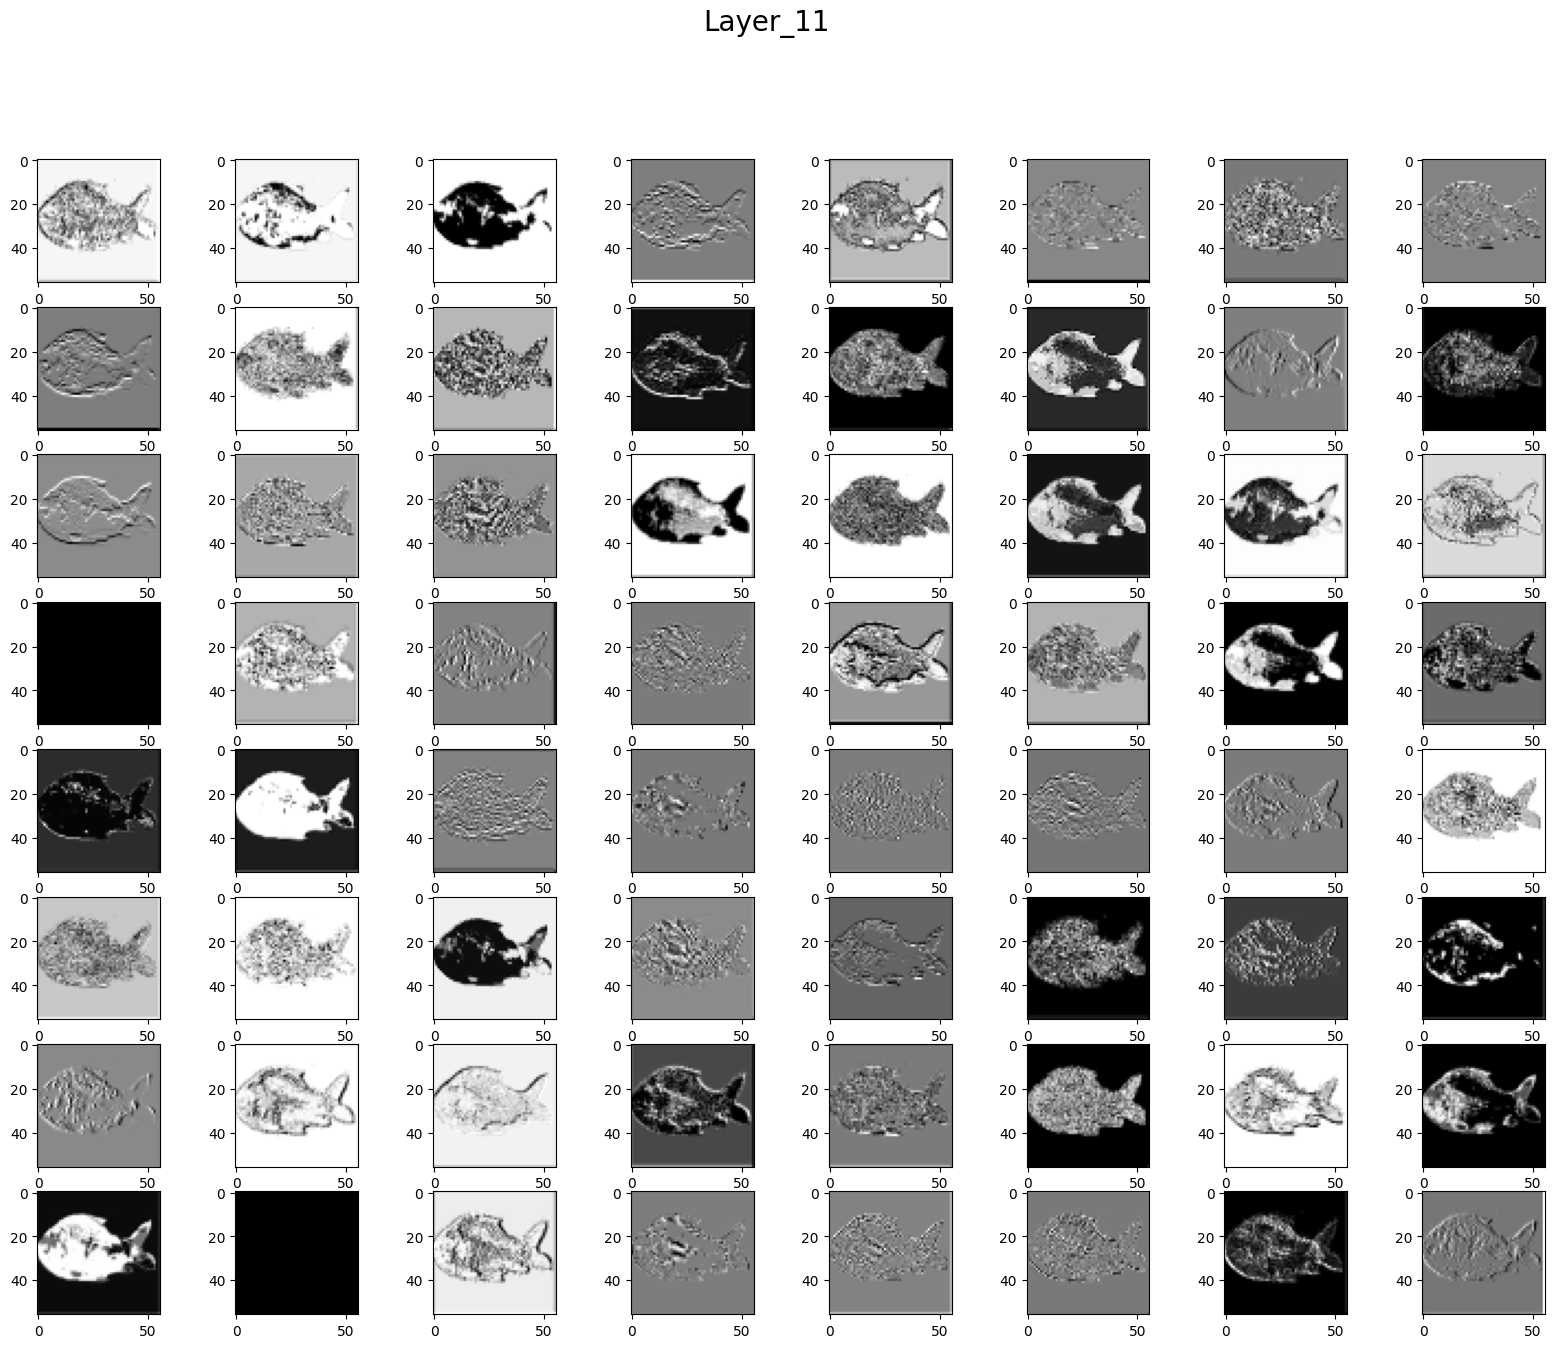

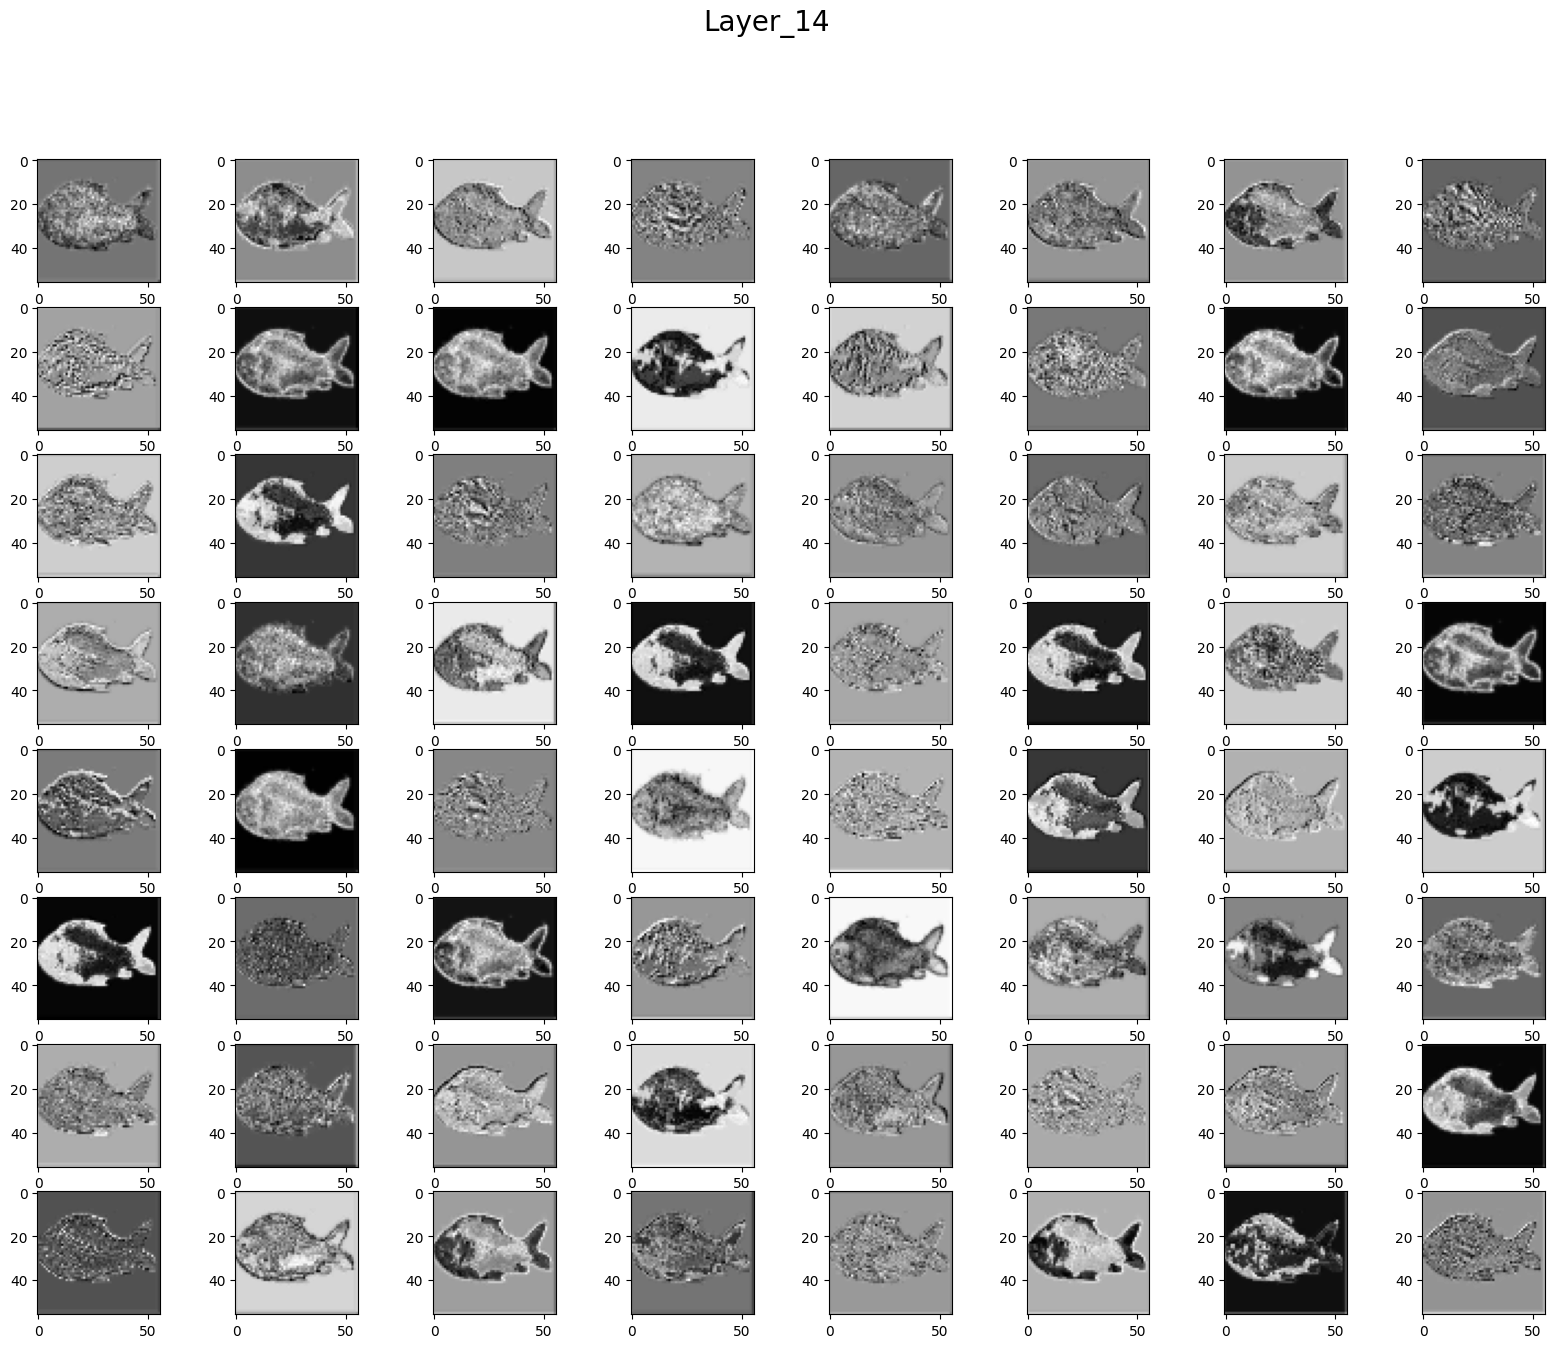

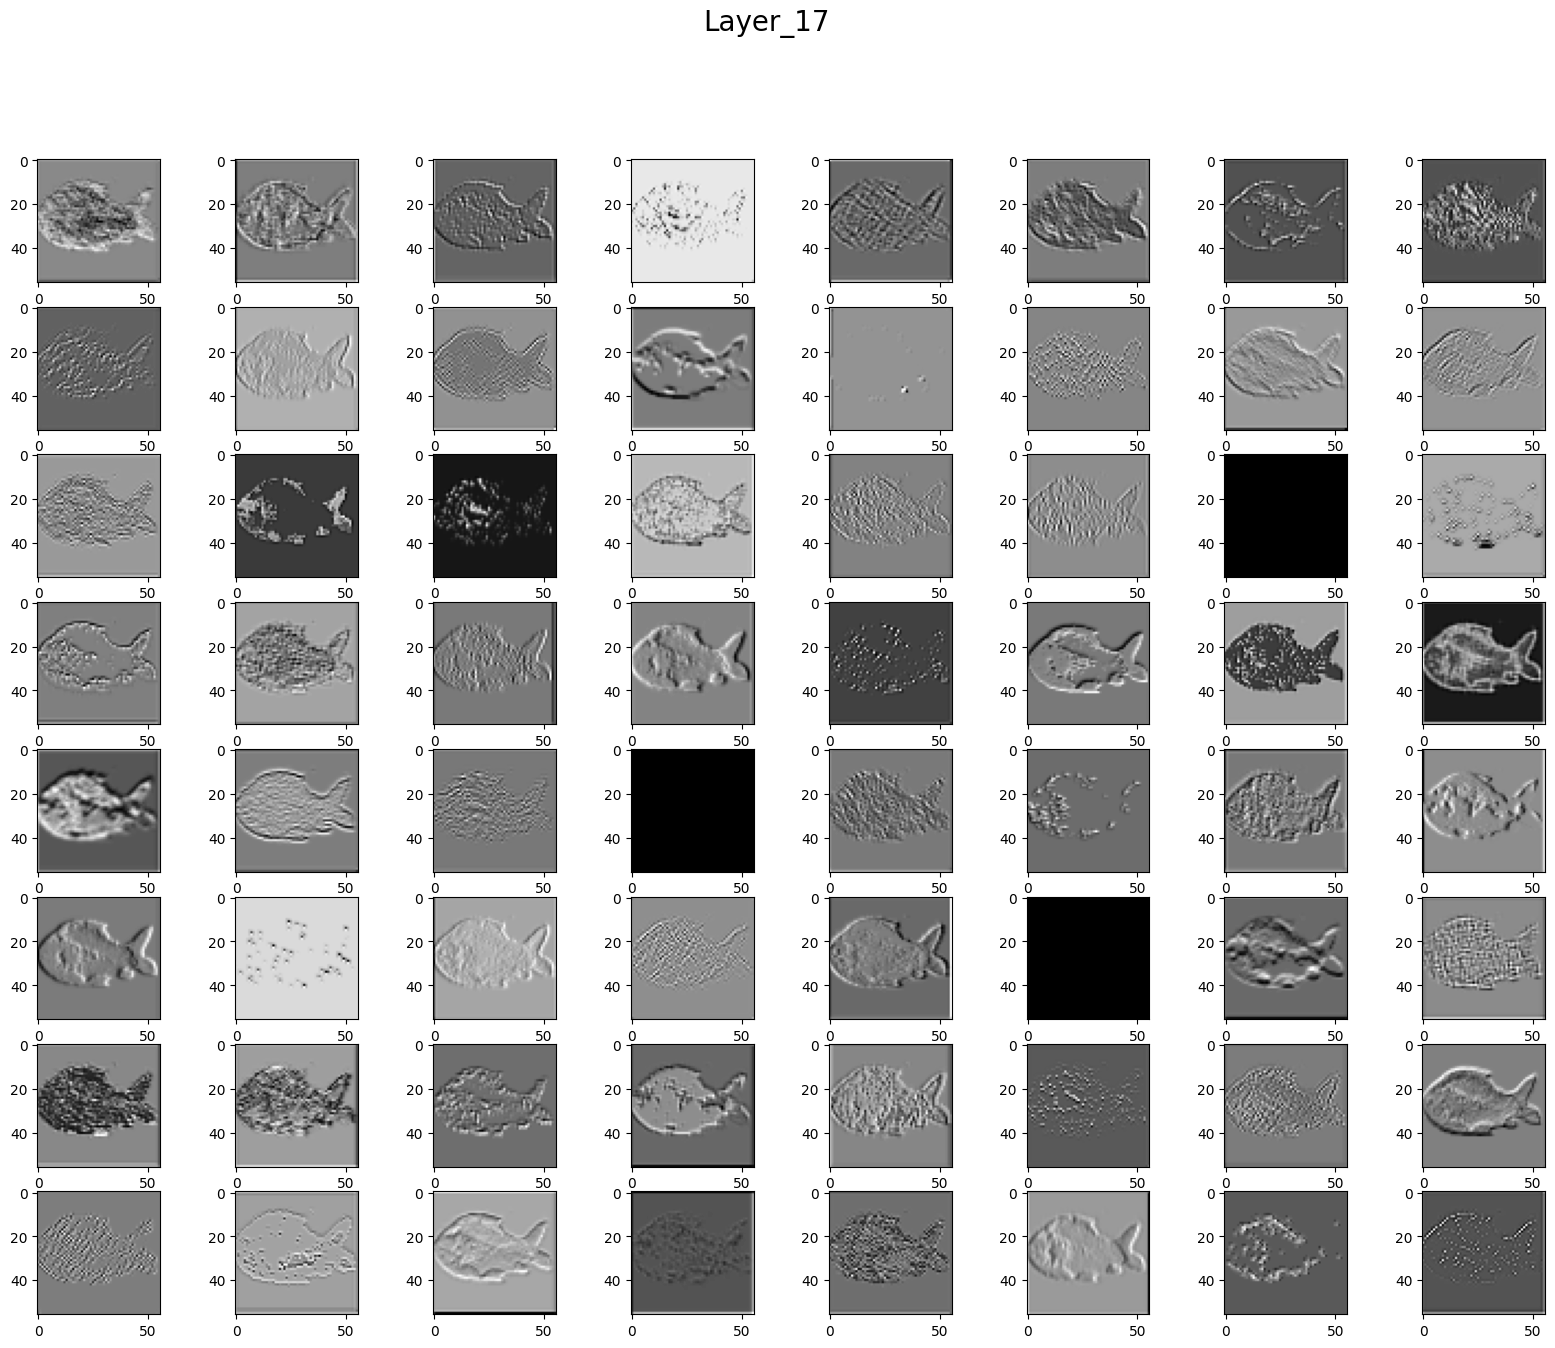

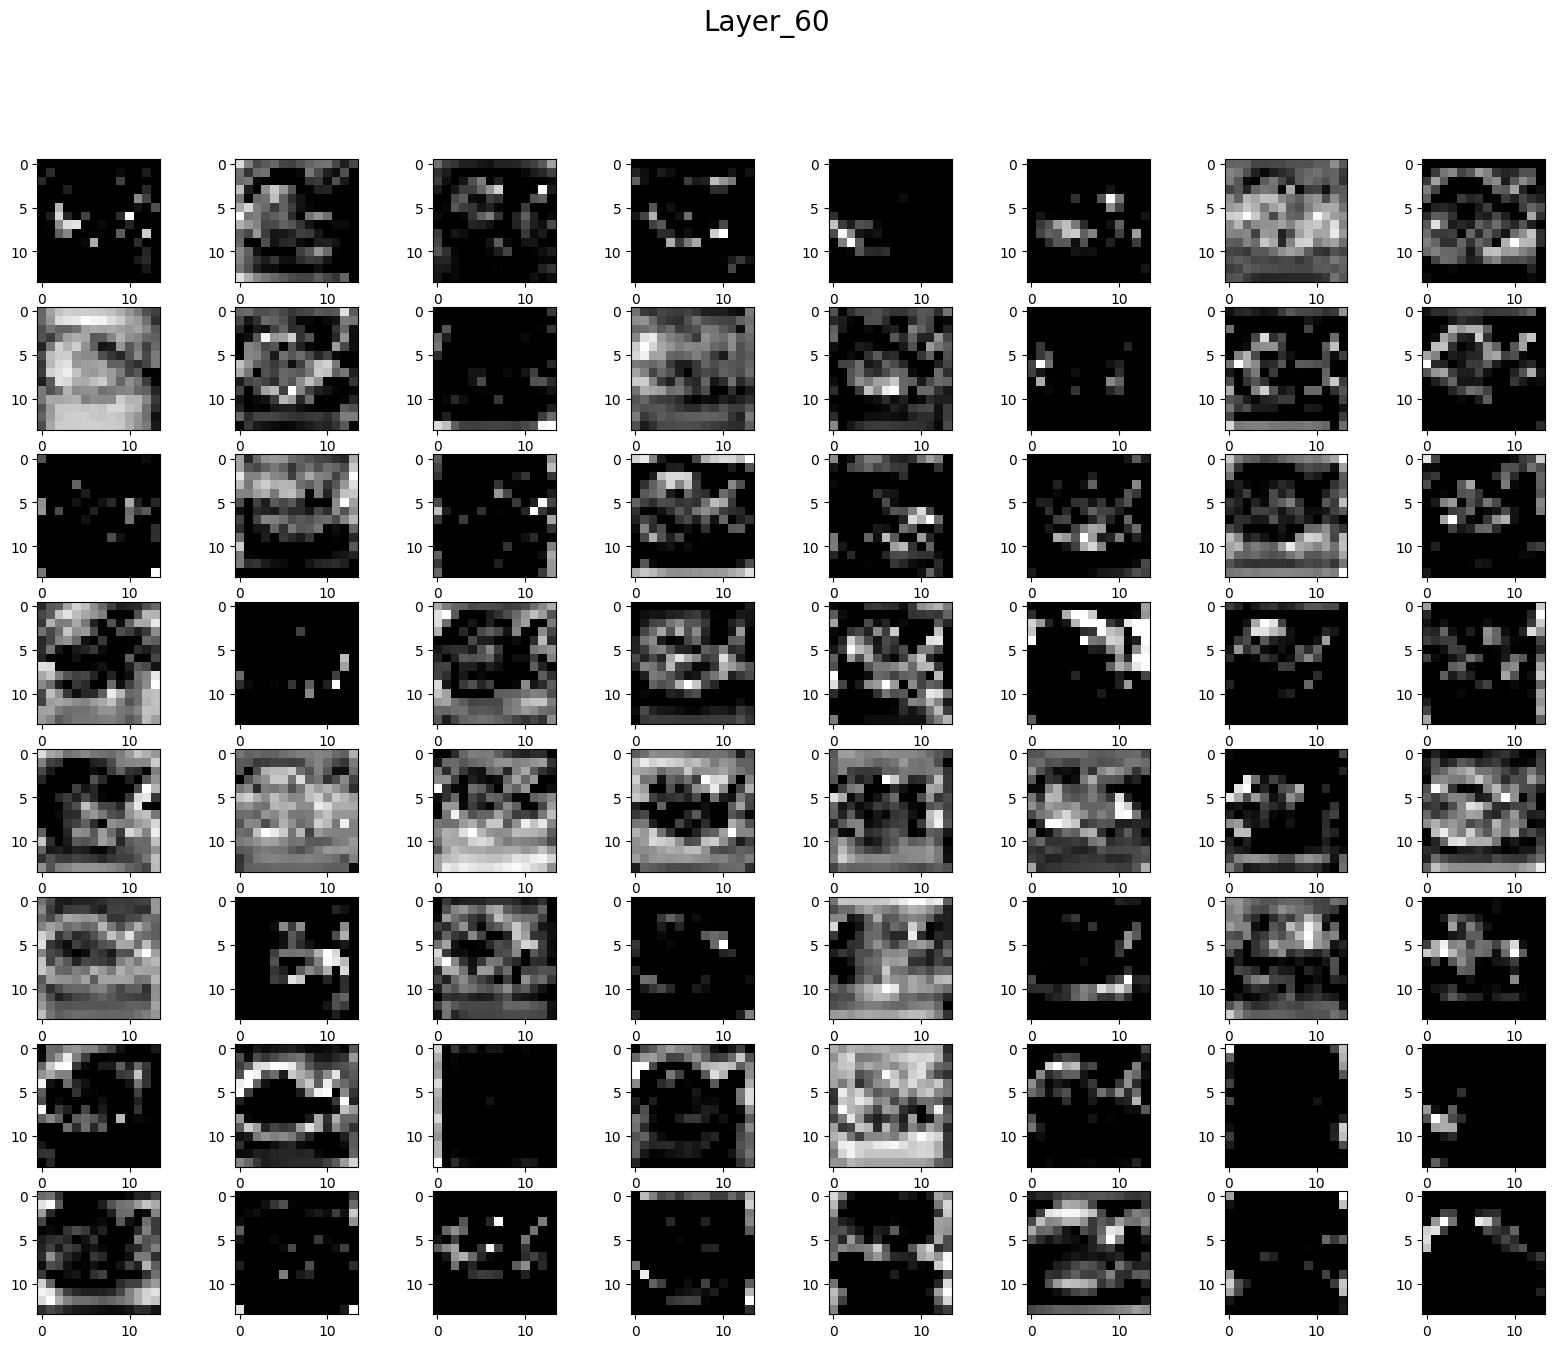

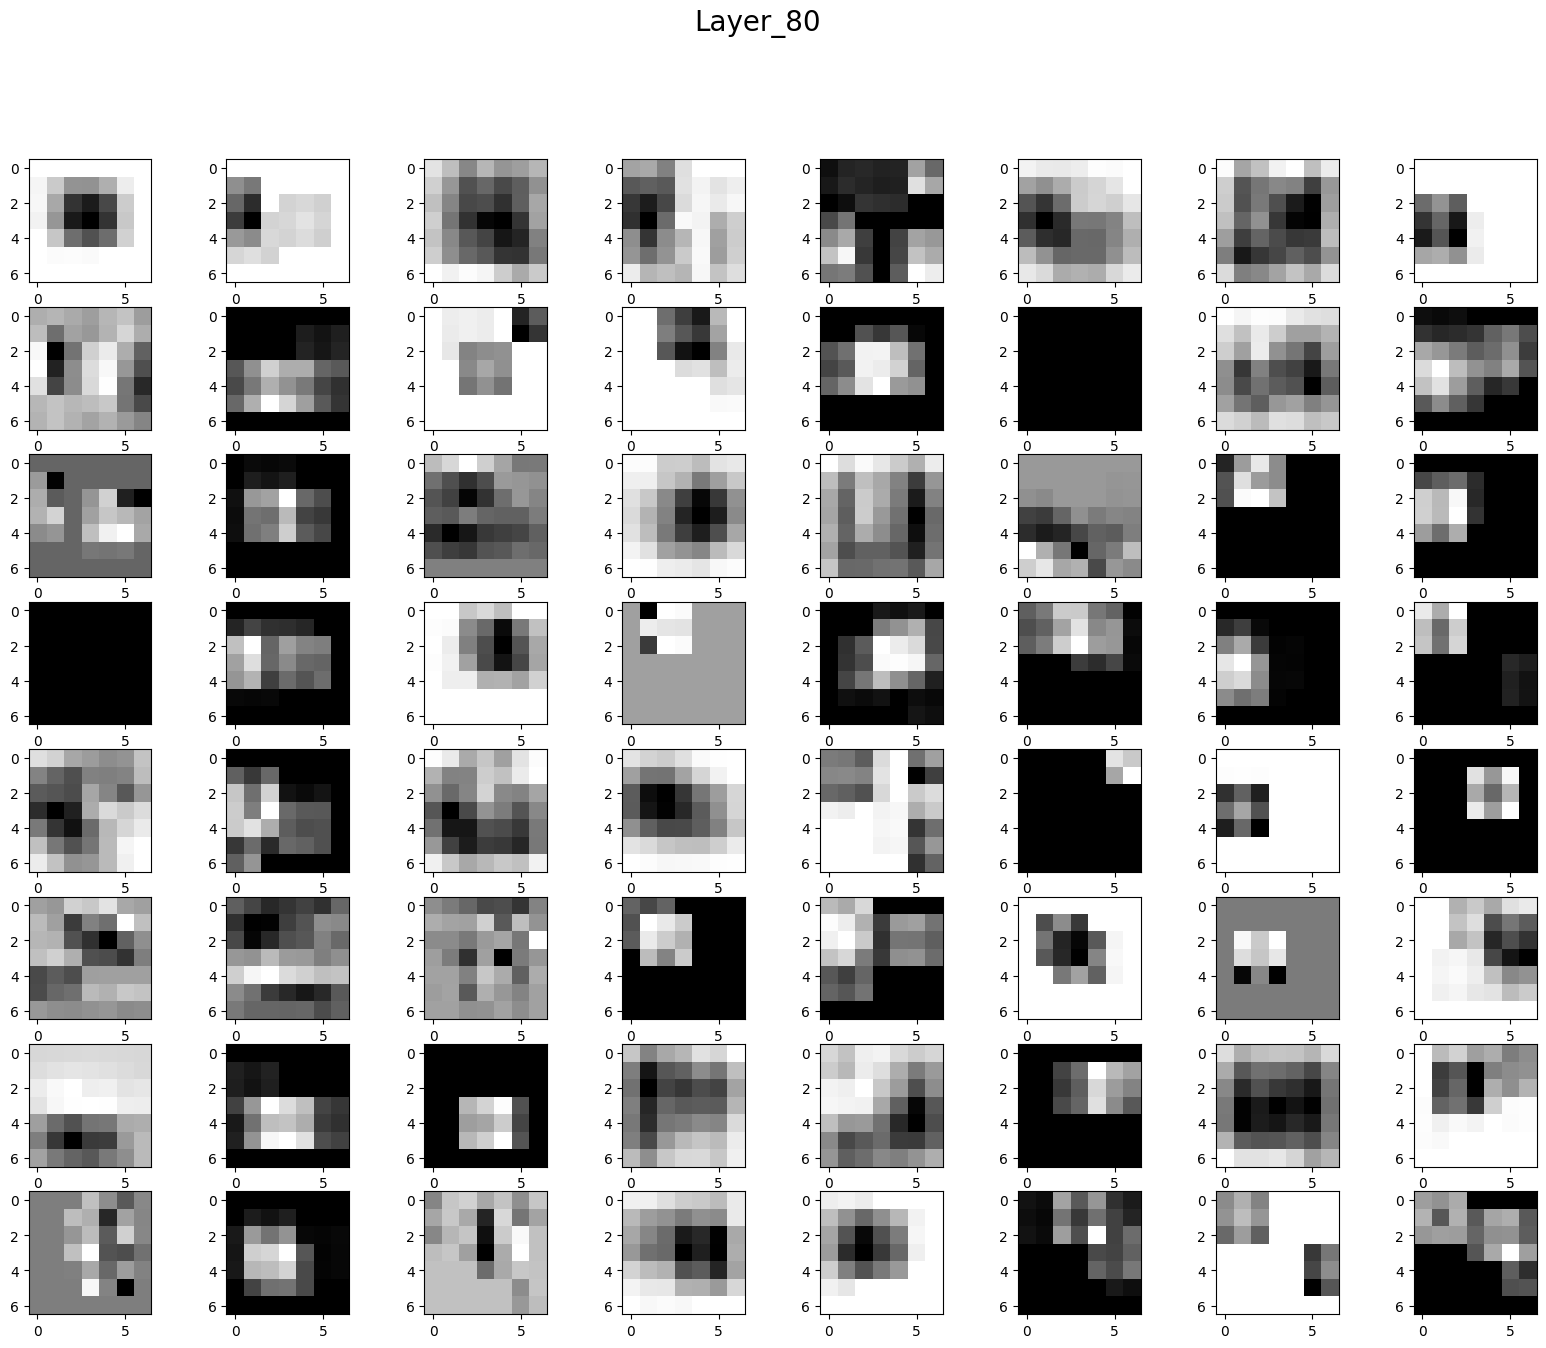

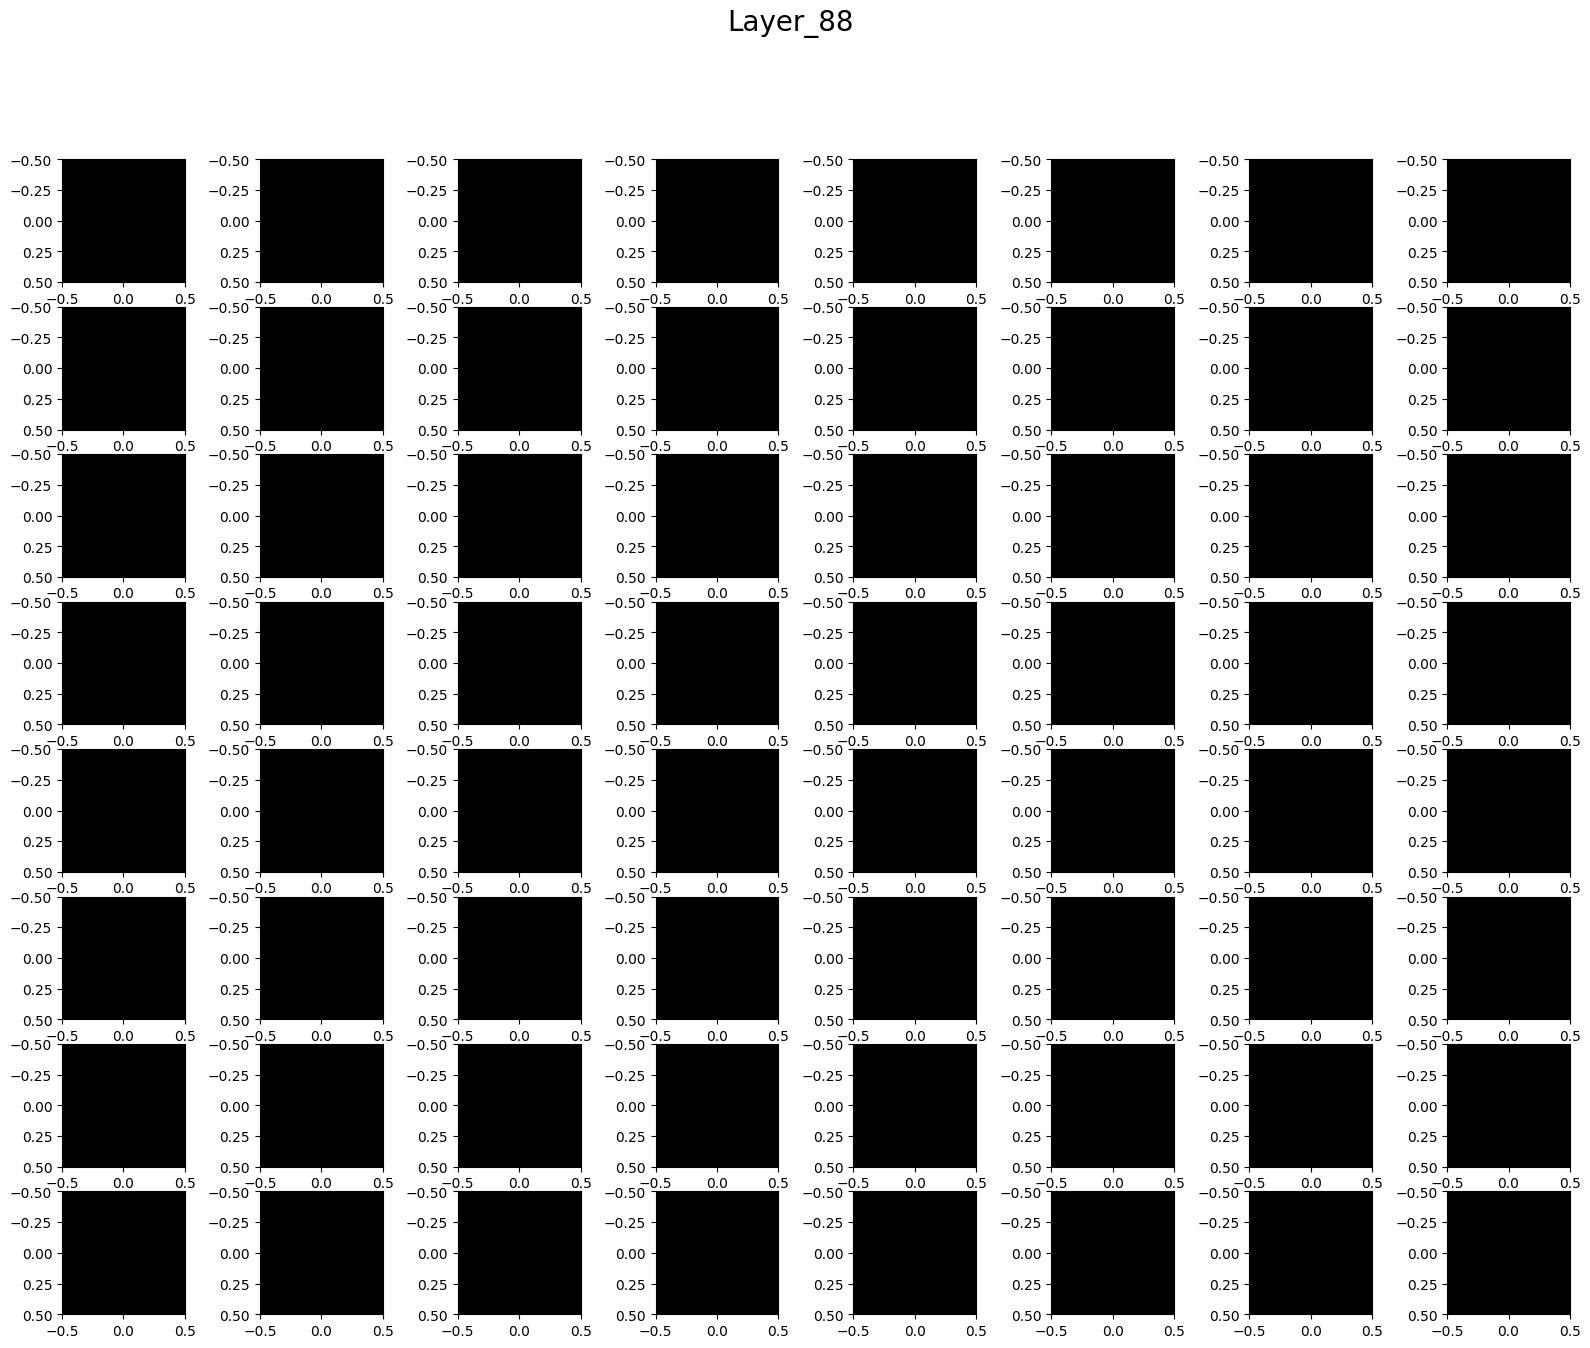

In [32]:
#image2 = load_img("internet_samples/Rohu-Main.jpg" , target_size=(256,256))

'''feature_map = model3.predict(image)

for i,fmap in zip(layer_index,feature_map):
    fig = pyplot.figure(figsize=(20,15))
    fig.suptitle("Layer_{}".format(i) , fontsize=20)
    for i in range(1,features.shape[3]+1):

        pyplot.subplot(8,8,i)
        pyplot.imshow(fmap[0,:,:,i-1] , cmap='gray')
    
pyplot.show();'''

#image2 = load_img("internet_samples/Rohu-Main.jpg" , target_size=(256,256))

feature_map = model3.predict(image)

for i, fmap in zip(layer_index, feature_map):
    fig = plt.figure(figsize=(20, 15))
    fig.suptitle("Layer_{}".format(i), fontsize=20)
    for j in range(1, min(fmap.shape[3] + 1, 65)):
        plt.subplot(8, 8, j)
        plt.imshow(fmap[0, :, :, j-1], cmap='gray')
    
plt.show()


In [18]:
lm = tf.keras.models.load_model("Base_model_results/fish_iden_1.h5")

In [21]:
lm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 246016)            0         
                                                                 
 dense_3 (Dense)             (None, 128)              